In [38]:
from ad import *
import numpy as np
import matplotlib.pyplot as plt

In [46]:
x = Variable('x')

def function(values):
    '''
    Takes in dictionary of values and returns f(x) and f'(x)
    Function being evaluated is defined within this block
    Value of function and gradient then used in Newton loop
    Function also used for demonstration plot, bottom of notebook
    '''
    function = 2*x + 3*Sin(x) + 10*Power(x, 3) +4*Tanh(x) + 5
    val = function.eval(values)
    grad = function.d(values)
    return val, grad

def Newton_Method(x_initial_guess):
    '''
    Takes in an initial guess for the location of the root
    Convergence of the method can dependent on this guess and shape of function
    While loop used to carry out iterations until change in x (delta_x) below tolerance
    Function returns final root, and lists of points visited during iteration
    '''
    x_var = x_initial_guess
    tol = 1e-12
    delta_x = np.inf
    val_list = []
    x_points = []
    
    while abs(delta_x) > tol:
        values = {x : x_var}
        x_points.append(x_var)
        val, grad = function(values)
        val_list.append(val)
        delta_x = val/grad
        x_var -= delta_x
    
    final_root = x_var
    
    return final_root, x_points, val_list

In [47]:
#simple demonstration of our Newton_Method function
initial_guess = 2
root, points, val_points = Newton_Method(initial_guess)

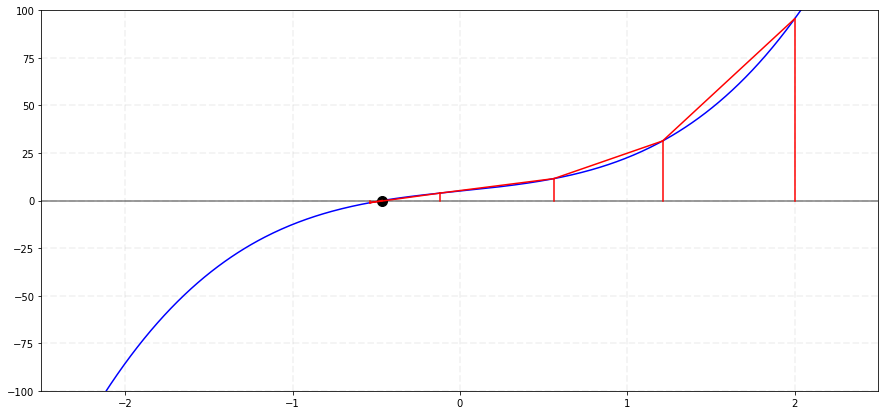

In [51]:
#plot function and show steps taken by the Newton Method

fig, ax = plt.subplots(figsize=(15, 7))
ax.grid(True, lw=1.76, ls='--', alpha = 0.15)

xs = list(np.linspace(-5, 5, 1000, endpoint = True))
y_ground = np.linspace(0,0,1000)
ys = []

for x_var in xs:
    values = {x:x_var}
    y, grad_y = function(values)
    ys.append(y)

plt.plot(xs, ys, '', color = 'b', ms =10) 
plt.plot(xs, y_ground, '', color = 'black', ms =10, alpha = 0.5) 
plt.plot(root, 0, 'o', color = 'black', ms =10) 

for i, (x_i, y_i) in enumerate(zip(points, val_points)):
    y_line = np.linspace(0, y_i, 50, endpoint=True)
    x_line = np.linspace(x_i, x_i, 50)
    plt.plot(x_line, y_line, '', color = 'r', ms =10) 
    
    try:
        x_start = points[i]
        x_end = points[i+1]
        y_start = val_points[i]
        y_end = val_points[i+1]
        slope, intercept = np.polyfit((x_start, x_end), (y_start, y_end), 1)
        
        x_between = np.linspace(x_start, x_end, 100, endpoint = True)
        y_between = slope*x_between + intercept
        plt.plot(x_between, y_between, '', color = 'r', ms =10)
        
    except IndexError:
        pass;
    
plt.xlim(-2.5, 2.5)
plt.ylim(-100, 100)
plt.show()